In [176]:
import numpy as np
import statistics
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [163]:
#Gradient Descent Method for single variable regression
def beta0(beta0,beta1):
    return lambda x,y: 2*(beta0+beta1*x-y)
def beta1(beta0,beta1):
    return lambda x,y: 2*x*(beta0+beta1*x-y)

In [164]:
#single variable regression
#X,Y denotes the input training data set
#beta0_start,beta1_start are start points
#num: iteration times
#alpha: learning rate
def gradient_descent_sig(X, Y, beta0_start, beta1_start,alpha,num):
    temp0 = 2 * beta0_start
    temp1 = 2 * beta1_start
    for _ in range(num):
        temp0 = temp0 - alpha *\
        statistics.mean(map(beta0(temp0, temp1), X, Y))
        temp1 = temp1 - alpha *\
        statistics.mean(map(beta1(temp0, temp1), X, Y))
    
    return temp0,temp1
        

In [165]:
X = np.array([1,2,3,4,5,6,7,8,9])
Y = np.array([12,14,17,16,19,23,26,29,35])

In [166]:
[b0,b1]=gradient_descent_sig(X,Y,1,2,0.001,100000)
b0,b1

(7.722222222221089, 2.7000000000001823)

In [167]:
#compare my model with sklearn's linear_model

In [168]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X.reshape(-1,1), Y.ravel())
print(regr.coef_)
print(regr.intercept_)

[2.7]
7.722222222222221


In [169]:
#Multi_variate Regression:


In [182]:
#multivariable regression
#X,Y denotes the input training data set
#*args means the start points
#num: iteration times
#alpha: learning rate
def gradient_descent(X, Y,alpha,num,*args):
    dim = X.shape[0]
    leng = X.shape[1]
    beta = []
    X_ = np.vstack((np.ones(leng),X))
    for arg in args:
        beta.append(arg)
        
    J_history = np.zeros(num)
    
    for i in range(num):
        beta = beta - alpha*(-2*X_.dot(Y)+2*np.dot(X_.dot(X_.T),beta))
        J_history[i] = (Y-X_.T.dot(beta)).dot((Y-X_.T.dot(beta)).T)
    
    
    plt.plot(J_history)
    plt.ylabel('Cost J')
    plt.xlabel('Iterations');
    return beta


array([ 2.98693938,  0.82837315, -0.06794491,  0.69088725])

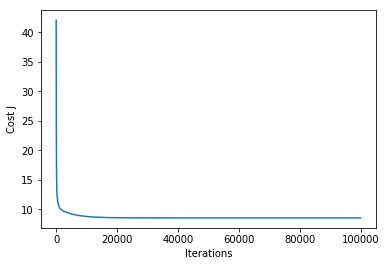

In [192]:
X2 = np.array([[1,2,3,4,5,6,7,8,9],[5,4,6,8,2,7,9,4,10],[12,15,14,17,18,23,26,28,36]])
gradient_descent(X2, Y,0.0001,100000,1,1,1,1)
#The plot show the relationship between iterations and cost function

In [172]:
#Compare my model with analytical solution
X2 = np.vstack((np.ones(9),X2))
inv(X2.dot(X2.T)).dot(X2).dot(Y)

array([ 2.98700587,  0.82838878, -0.06794521,  0.69088063])

In [173]:
beta = np.array([1,2,3,4])

85623.0